In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
file_path = '../Dataset/bank_customer.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,ID,Gender,Month_Income,Age,Region_Code,Occupation,Credit_Score,Loan_Status,Existing_Credit_Cards,Avg_Account_Balance,Account_Category,Tenure_with_Bank,Lead_Outcome
0,0,VBENBARO,Male,96345.0,29,254,Other,623,Yes,4,742366,X1,2,No
1,1,CCMEWNKY,Male,85640.0,43,268,Other,629,NaN,0,925537,X2,1,No
2,2,VK3KGA9M,Male,96345.0,31,270,Salaried,357,No,0,215949,X1,1,No
3,3,TT8RPZVC,Male,85640.0,29,272,Other,356,No,0,868070,X1,3,No
4,4,SHQZEYTZ,Female,42820.0,29,270,Other,572,No,0,657087,X1,3,No


In [4]:
df.tail()

,Unnamed: 0,ID,Gender,Month_Income,Age,Region_Code,Occupation,Credit_Score,Loan_Status,Existing_Credit_Cards,Avg_Account_Balance,Account_Category,Tenure_with_Bank,Lead_Outcome
104995,104995,DXH8IPX5,Male,53525.0,27,280,Self_Employed,364,Yes,5,1168792,X1,2,No
104996,104996,KCJVCFTF,Male,74935.0,55,284,Self_Employed,400,Yes,3,6150086,X2,2,No
104997,104997,DAH8ST9U,Female,53525.0,31,268,Self_Employed,502,No,0,743897,X1,4,No
104998,104998,HSAAXEVZ,Male,157875.0,47,283,Self_Employed,824,Yes,1,1918608,X3,9,Yes
104999,104999,EMZ6N5ZT,Male,210500.0,49,276,Self_Employed,897,NaN,0,775955,X2,12,Yes


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             105000 non-null  int64  
 1   ID                     105000 non-null  object 
 2   Gender                 105000 non-null  object 
 3   Month_Income           102514 non-null  float64
 4   Age                    105000 non-null  int64  
 5   Region_Code            105000 non-null  int64  
 6   Occupation             102486 non-null  object 
 7   Credit_Score           105000 non-null  int64  
 8   Loan_Status            92511 non-null   object 
 9   Existing_Credit_Cards  105000 non-null  int64  
 10  Avg_Account_Balance    105000 non-null  int64  
 11  Account_Category       105000 non-null  object 
 12  Tenure_with_Bank       105000 non-null  int64  
 13  Lead_Outcome           105000 non-null  object 
dtypes: float64(1), int64(7), object(6)
m

In [7]:
df.shape

(105000, 14)

In [8]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***" * 10)

ID
VBENBARO    1
BLZUEXVT    1
TSQ8837V    1
GRYHKCES    1
47LKWBXA    1
           ..
AQDBD3PJ    1
XQVM4TK3    1
4ETJYYJ7    1
A8YMAYWP    1
EMZ6N5ZT    1
Name: count, Length: 105000, dtype: int64
******************************
Gender
Male      57546
Female    47454
Name: count, dtype: int64
******************************
Occupation
Self_Employed    42027
Salaried         30066
Other            29343
Entrepreneur      1050
Name: count, dtype: int64
******************************
Loan_Status
No     61431
Yes    31080
Name: count, dtype: int64
******************************
Account_Category
X1    44338
X3    29191
X2    29097
X4     2374
Name: count, dtype: int64
******************************
Lead_Outcome
No     63605
Yes    41395
Name: count, dtype: int64
******************************


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,105000.0,5.249950e+04,30311.033470,0.0,26249.75,52499.5,78749.25,104999.0
Month_Income,102514.0,1.015503e+05,45538.879021,42820.0,64230.00,94725.0,126300.00,210500.0
Age,105000.0,4.387538e+01,14.873280,24.0,30.00,43.0,54.00,85.0
Region_Code,105000.0,2.698330e+02,10.903446,250.0,261.00,269.0,280.00,284.0
Credit_Score,105000.0,6.026426e+02,180.611716,300.0,444.00,590.0,771.00,900.0
Existing_Credit_Cards,105000.0,1.204790e+00,2.119789,0.0,0.00,0.0,2.00,7.0
Avg_Account_Balance,105000.0,1.134120e+06,866371.377076,22597.0,603960.00,896470.0,1371552.00,9908858.0
Tenure_with_Bank,105000.0,5.748619e+00,4.098435,1.0,3.00,5.0,9.00,15.0


In [10]:
df.describe(include="object")

,ID,Gender,Occupation,Loan_Status,Account_Category,Lead_Outcome
count,105000,105000,102486,92511,105000,105000
unique,105000,2,4,2,4,2
top,VBENBARO,Male,Self_Employed,No,X1,No
freq,1,57546,42027,61431,44338,63605


In [11]:
# Select columns with NUmerical data types
numerical_cols = df.select_dtypes(include=['float64','int64']).columns.to_list()
numerical_cols

['Unnamed: 0',
 'Month_Income',
 'Age',
 'Region_Code',
 'Credit_Score',
 'Existing_Credit_Cards',
 'Avg_Account_Balance',
 'Tenure_with_Bank']

In [12]:
# Select columns with NUmerical data types
numerical_cols = df.select_dtypes(include=['float64','int64']).columns.to_list()
numerical_cols

['Unnamed: 0',
 'Month_Income',
 'Age',
 'Region_Code',
 'Credit_Score',
 'Existing_Credit_Cards',
 'Avg_Account_Balance',
 'Tenure_with_Bank']

In [13]:
# For Numerical columns: Check for missing values (NaN)
missing_values_numerical = df[numerical_cols].isnull().sum()
unknown_values_numerical = (df[numerical_cols] == 'unknown').sum()
print("\nMissing Values in Numerical Columns:\n", missing_values_numerical)
print("\nMissing Values in Numerical Columns:\n", unknown_values_numerical)


Missing Values in Numerical Columns:
 Unnamed: 0                  0
Month_Income             2486
Age                         0
Region_Code                 0
Credit_Score                0
Existing_Credit_Cards       0
Avg_Account_Balance         0
Tenure_with_Bank            0
dtype: int64

Missing Values in Numerical Columns:
 Unnamed: 0               0
Month_Income             0
Age                      0
Region_Code              0
Credit_Score             0
Existing_Credit_Cards    0
Avg_Account_Balance      0
Tenure_with_Bank         0
dtype: int64


In [14]:
for column in missing_values_numerical.index:
    if df[column].isnull().any():
        df[column] = df[column].fillna(df[column].mean())

In [15]:
#print("\nMissing Values in Numerical Columns:\n", missing_values_numerical)
print(df.isnull().sum())  # To verify no missing values remain

Unnamed: 0                   0
ID                           0
Gender                       0
Month_Income                 0
Age                          0
Region_Code                  0
Occupation                2514
Credit_Score                 0
Loan_Status              12489
Existing_Credit_Cards        0
Avg_Account_Balance          0
Account_Category             0
Tenure_with_Bank             0
Lead_Outcome                 0
dtype: int64


In [16]:
# Select columns with categorical data types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
categorical_cols

['ID',
 'Gender',
 'Occupation',
 'Loan_Status',
 'Account_Category',
 'Lead_Outcome']

In [17]:
# For Categorical columns: Check for missing and 'unknown' values
missing_values_categorical = df[categorical_cols].isnull().sum()
unknown_values_categorical = (df[categorical_cols] == 'unknown').sum()
print("\nMissing Values in Categorical Columns:\n", missing_values_categorical)
print("\n'Unknown' Values in Categorical Columns:\n", unknown_values_categorical)


Missing Values in Categorical Columns:
 ID                      0
Gender                  0
Occupation           2514
Loan_Status         12489
Account_Category        0
Lead_Outcome            0
dtype: int64

'Unknown' Values in Categorical Columns:
 ID                  0
Gender              0
Occupation          0
Loan_Status         0
Account_Category    0
Lead_Outcome        0
dtype: int64


In [18]:
for column in missing_values_categorical.index:
    if df[column].isnull().any():
        mode_value = df[column].mode()[0] 
        df[column] = df[column].fillna(mode_value)  

In [19]:
print(df.isnull().sum())  # To verify no missing values remain

Unnamed: 0               0
ID                       0
Gender                   0
Month_Income             0
Age                      0
Region_Code              0
Occupation               0
Credit_Score             0
Loan_Status              0
Existing_Credit_Cards    0
Avg_Account_Balance      0
Account_Category         0
Tenure_with_Bank         0
Lead_Outcome             0
dtype: int64


In [20]:
# Drop unnecessary columns
df.drop(['Unnamed: 0','ID','Region_Code'], axis=1, inplace=True)

In [21]:
df.head()

,Gender,Month_Income,Age,Occupation,Credit_Score,Loan_Status,Existing_Credit_Cards,Avg_Account_Balance,Account_Category,Tenure_with_Bank,Lead_Outcome
0,Male,96345.0,29,Other,623,Yes,4,742366,X1,2,No
1,Male,85640.0,43,Other,629,No,0,925537,X2,1,No
2,Male,96345.0,31,Salaried,357,No,0,215949,X1,1,No
3,Male,85640.0,29,Other,356,No,0,868070,X1,3,No
4,Female,42820.0,29,Other,572,No,0,657087,X1,3,No


In [22]:
#checking for outliers
def check_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        outliers[column] = outliers_in_column[column]
        
        print(f"Column: {column}")
        print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
        print(f"Number of outliers in {column}: {len(outliers_in_column)}")
        print("*"*40)
        
    return outliers

outliers = check_outliers_iqr(df)


Column: Month_Income
Lower bound: -13087.5, Upper bound: 193092.5
Number of outliers in Month_Income: 5904
****************************************
Column: Age
Lower bound: -6.0, Upper bound: 90.0
Number of outliers in Age: 0
****************************************
Column: Credit_Score
Lower bound: -46.5, Upper bound: 1261.5
Number of outliers in Credit_Score: 0
****************************************
Column: Existing_Credit_Cards
Lower bound: -3.0, Upper bound: 5.0
Number of outliers in Existing_Credit_Cards: 8600
****************************************
Column: Avg_Account_Balance
Lower bound: -547428.0, Upper bound: 2522940.0
Number of outliers in Avg_Account_Balance: 6197
****************************************
Column: Tenure_with_Bank
Lower bound: -6.0, Upper bound: 18.0
Number of outliers in Tenure_with_Bank: 0
****************************************


In [23]:
# Calculate the IQR for the 'Month_Income' column
Q1 = df['Month_Income'].quantile(0.25)
Q3 = df['Month_Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering the dataset
data_filtered = df[(df['Month_Income'] >= lower_bound) & (df['Month_Income'] <= upper_bound)]
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(data_filtered)}")

Original number of rows: 105000
Number of rows after removing outliers: 99096


In [24]:
# Calculate the IQR for the 'Month_Income' column
Q1 = df['Existing_Credit_Cards'].quantile(0.25)
Q3 = df['Existing_Credit_Cards'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering the dataset
data_filtered = df[(df['Existing_Credit_Cards'] >= lower_bound) & (df['Existing_Credit_Cards'] <= upper_bound)]
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(data_filtered)}")

Original number of rows: 105000
Number of rows after removing outliers: 96400


In [25]:
# Calculate the IQR for the 'Month_Income' column
Q1 = df['Avg_Account_Balance'].quantile(0.25)
Q3 = df['Avg_Account_Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering the dataset
data_filtered = df[(df['Avg_Account_Balance'] >= lower_bound) & (df['Avg_Account_Balance'] <= upper_bound)]
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(data_filtered)}")

Original number of rows: 105000
Number of rows after removing outliers: 98803


In [26]:
# Reuse the function to check for outliers in the filtered dataset
outliers_after_filter = check_outliers_iqr(data_filtered)

# Check if all columns now have zero outliers
outliers_exist = any(len(outliers_after_filter[col]) > 0 for col in outliers_after_filter)

if outliers_exist:
    print("Some columns still have outliers.")
else:
    print("All columns have zero outliers after filtering.")


Column: Month_Income
Lower bound: -13087.5, Upper bound: 193092.5
Number of outliers in Month_Income: 5454
****************************************
Column: Age
Lower bound: -4.5, Upper bound: 87.5
Number of outliers in Age: 0
****************************************
Column: Credit_Score
Lower bound: -47.5, Upper bound: 1260.5
Number of outliers in Credit_Score: 0
****************************************
Column: Existing_Credit_Cards
Lower bound: -3.0, Upper bound: 5.0
Number of outliers in Existing_Credit_Cards: 8144
****************************************
Column: Avg_Account_Balance
Lower bound: -414196.5, Upper bound: 2258151.5
Number of outliers in Avg_Account_Balance: 2066
****************************************
Column: Tenure_with_Bank
Lower bound: -4.5, Upper bound: 15.5
Number of outliers in Tenure_with_Bank: 0
****************************************
Some columns still have outliers.


##### Check the imbalance

In [27]:
# Select columns with categorical data types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
categorical_cols

['Gender', 'Occupation', 'Loan_Status', 'Account_Category', 'Lead_Outcome']

In [28]:
for column in categorical_cols:
    value_counts = df[column].value_counts()
    
    percentages = (value_counts / len(df)) * 100
    
    print(pd.DataFrame({'Count': value_counts, 'Percentage': percentages}))
    print("-" * 40)

        Count  Percentage
Gender                   
Male    57546   54.805714
Female  47454   45.194286
----------------------------------------
               Count  Percentage
Occupation                      
Self_Employed  44541   42.420000
Salaried       30066   28.634286
Other          29343   27.945714
Entrepreneur    1050    1.000000
----------------------------------------
             Count  Percentage
Loan_Status                   
No           73920        70.4
Yes          31080        29.6
----------------------------------------
                  Count  Percentage
Account_Category                   
X1                44338   42.226667
X3                29191   27.800952
X2                29097   27.711429
X4                 2374    2.260952
----------------------------------------
              Count  Percentage
Lead_Outcome                   
No            63605    60.57619
Yes           41395    39.42381
----------------------------------------


In [29]:
# Select columns with NUmerical data types
numerical_cols = df.select_dtypes(include=['float64','int64']).columns.to_list()
numerical_cols

['Month_Income',
 'Age',
 'Credit_Score',
 'Existing_Credit_Cards',
 'Avg_Account_Balance',
 'Tenure_with_Bank']

In [30]:
for column in numerical_cols:
    value_counts = df[column].value_counts()
    
    percentages = (value_counts / len(df)) * 100
    
    print(pd.DataFrame({'Count': value_counts, 'Percentage': percentages}))
    print("-" * 40)

               Count  Percentage
Month_Income                    
85640.000000    8938    8.512381
42820.000000    8934    8.508571
107050.000000   8916    8.491429
74935.000000    8897    8.473333
64230.000000    8824    8.403810
96345.000000    8806    8.386667
53525.000000    8773    8.355238
210500.000000   2960    2.819048
199975.000000   2944    2.803810
136825.000000   2931    2.791429
147350.000000   2930    2.790476
126300.000000   2929    2.789524
105250.000000   2903    2.764762
189450.000000   2899    2.760952
168400.000000   2890    2.752381
94725.000000    2862    2.725714
115775.000000   2858    2.721905
84200.000000    2843    2.707619
157875.000000   2840    2.704762
73675.000000    2830    2.695238
178925.000000   2807    2.673333
101550.327858   2486    2.367619
----------------------------------------
     Count  Percentage
Age                   
28    6324    6.022857
29    5683    5.412381
27    5585    5.319048
30    4601    4.381905
26    3865    3.680952
..    

                       Count  Percentage
Existing_Credit_Cards                   
0                      73920   70.400000
3                       7418    7.064762
4                       4370    4.161905
6                       4329    4.122857
7                       4271    4.067619
5                       4259    4.056190
1                       3263    3.107619
2                       3170    3.019048
----------------------------------------
                     Count  Percentage
Avg_Account_Balance                   
4022185                 44    0.041905
936814                  14    0.013333
2521592                 13    0.012381
1387777                 13    0.012381
996203                  12    0.011429
...                    ...         ...
1939719                  1    0.000952
745953                   1    0.000952
1299471                  1    0.000952
560246                   1    0.000952
1918608                  1    0.000952

[78142 rows x 2 columns]
----------------

In [31]:
def categorize_tenure(value):
    if value in [1, 2, 3, 4]:
        return value
    elif value >= 10:
        return '10'
    elif value >=5:
        return '5'
    return value

# Apply the function to create a new column with categorized values
df['Tenure_with_Bank_Categorized'] = df['Tenure_with_Bank'].apply(categorize_tenure)

# Update the original column with the new categorized values
df['Tenure_with_Bank'] = df['Tenure_with_Bank_Categorized']

# Drop the temporary column
df.drop(columns=['Tenure_with_Bank_Categorized'], inplace=True)

In [32]:
for column in numerical_cols:
    value_counts = df[column].value_counts()
    
    percentages = (value_counts / len(df)) * 100
    
    print(pd.DataFrame({'Count': value_counts, 'Percentage': percentages}))
    print("-" * 40)

               Count  Percentage
Month_Income                    
85640.000000    8938    8.512381
42820.000000    8934    8.508571
107050.000000   8916    8.491429
74935.000000    8897    8.473333
64230.000000    8824    8.403810
96345.000000    8806    8.386667
53525.000000    8773    8.355238
210500.000000   2960    2.819048
199975.000000   2944    2.803810
136825.000000   2931    2.791429
147350.000000   2930    2.790476
126300.000000   2929    2.789524
105250.000000   2903    2.764762
189450.000000   2899    2.760952
168400.000000   2890    2.752381
94725.000000    2862    2.725714
115775.000000   2858    2.721905
84200.000000    2843    2.707619
157875.000000   2840    2.704762
73675.000000    2830    2.695238
178925.000000   2807    2.673333
101550.327858   2486    2.367619
----------------------------------------
     Count  Percentage
Age                   
28    6324    6.022857
29    5683    5.412381
27    5585    5.319048
30    4601    4.381905
26    3865    3.680952
..    

In [33]:
# Define Loan_Status as the target to be balanced
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Resample based on Loan_Status
X_res, y_res = ros.fit_resample(df.drop('Loan_Status', axis=1), df['Loan_Status'])

# Combine the resampled target back with the original features
df_resampled = pd.concat([pd.DataFrame(X_res, columns=df.drop('Loan_Status', axis=1).columns), pd.DataFrame(y_res, columns=['Loan_Status'])], axis=1)

print(df_resampled['Loan_Status'].value_counts())

Loan_Status
Yes    73920
No     73920
Name: count, dtype: int64


In [34]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147840 entries, 0 to 147839
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 147840 non-null  object 
 1   Month_Income           147840 non-null  float64
 2   Age                    147840 non-null  int64  
 3   Occupation             147840 non-null  object 
 4   Credit_Score           147840 non-null  int64  
 5   Existing_Credit_Cards  147840 non-null  int64  
 6   Avg_Account_Balance    147840 non-null  int64  
 7   Account_Category       147840 non-null  object 
 8   Tenure_with_Bank       147840 non-null  object 
 9   Lead_Outcome           147840 non-null  object 
 10  Loan_Status            147840 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.4+ MB


In [35]:
print("\nStatistical summary of the dataset")
df_resampled.describe()


Statistical summary of the dataset


,Month_Income,Age,Credit_Score,Existing_Credit_Cards,Avg_Account_Balance
count,147840.000000,147840.000000,147840.000000,147840.000000,1.478400e+05
mean,99919.390746,44.690902,594.546131,2.035924,1.148027e+06
std,44308.749807,14.757329,179.119143,2.429732,8.684355e+05
min,42820.000000,24.000000,300.000000,0.000000,2.259700e+04
25%,64230.000000,30.000000,439.000000,0.000000,6.143998e+05
50%,94725.000000,44.000000,578.000000,0.500000,9.139410e+05
75%,115775.000000,54.000000,763.000000,4.000000,1.389120e+06
max,210500.000000,85.000000,900.000000,7.000000,9.908858e+06


In [36]:
sns.set(style="whitegrid")

# Function to plot distributions
def plot_distribution(column):
    plt.figure(figsize=(12, 6))
    if df_resampled[column].dtype == 'object':
        sns.countplot(x=column, data=df_resampled, palette='viridis')
        plt.title(f'Distribution of {column}')
    else:
        sns.histplot(df_resampled[column], bins=30, kde=True, color='skyblue')
        plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Function to plot count plot by target
def plot_by_target(column, target_column='Lead_Outcome'):
    plt.figure(figsize=(12, 6))
    if df_resampled[column].dtype == 'object':
        sns.countplot(x=column, hue=target_column, data=df_resampled, palette='Set2')
        plt.title(f'{column} Distribution by {target_column}')
    else:
        sns.boxplot(x=target_column, y=column, data=df_resampled, palette='Set2')
        plt.title(f'{column} Distribution by {target_column}')
    plt.xlabel(column)
    plt.ylabel('Count' if df_resampled[column].dtype == 'object' else column)
    plt.show()


##### Month Income

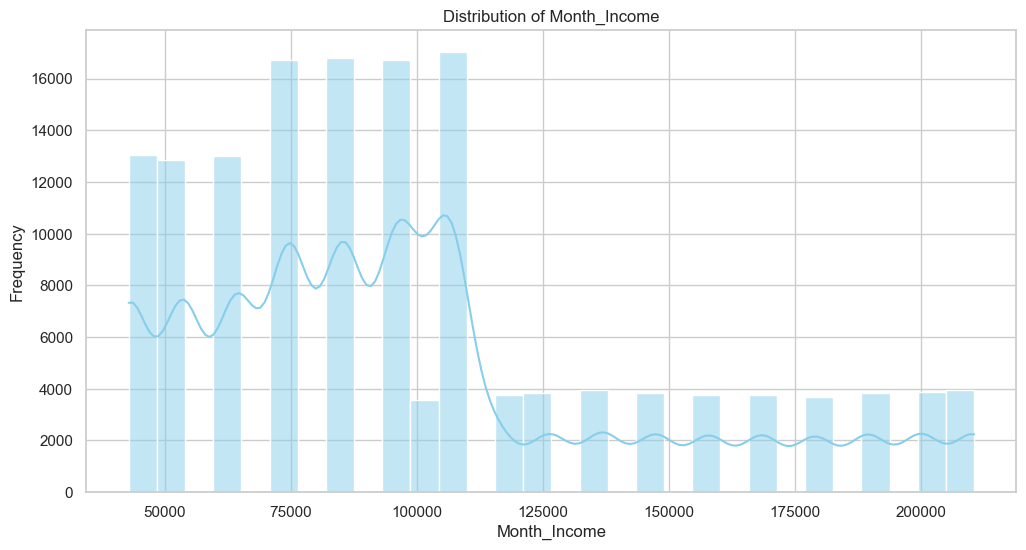

C:\Users\thamu\AppData\Local\Temp\ipykernel_7592\2402550579.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=column, data=df_resampled, palette='Set2')


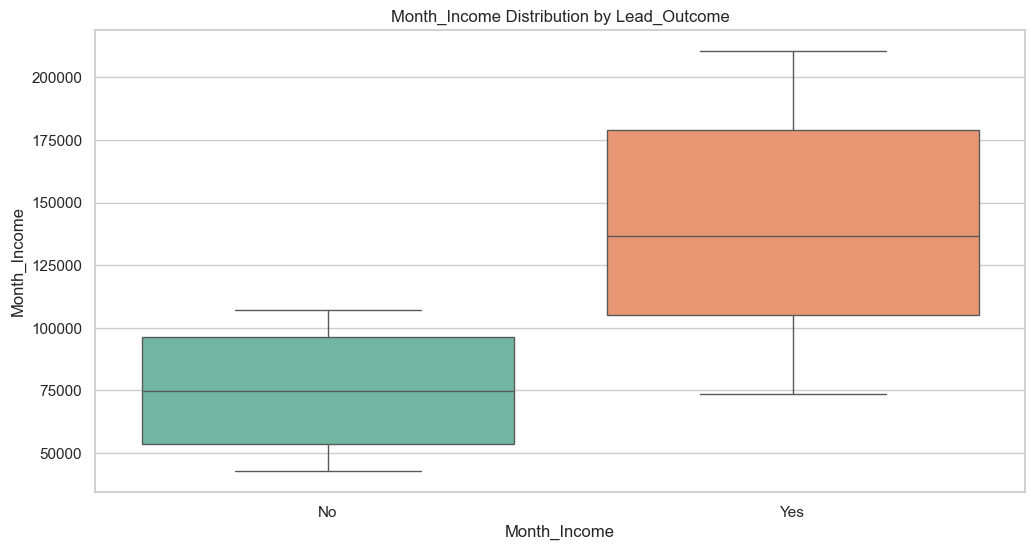

In [37]:
plot_distribution('Month_Income')
plot_by_target('Month_Income')

##### AGE

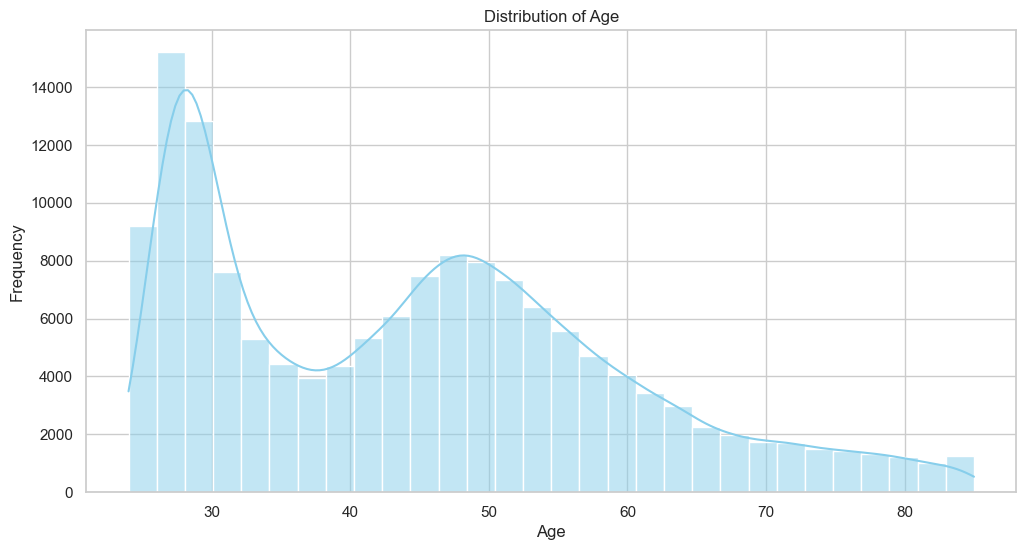

C:\Users\thamu\AppData\Local\Temp\ipykernel_7592\2402550579.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=column, data=df_resampled, palette='Set2')


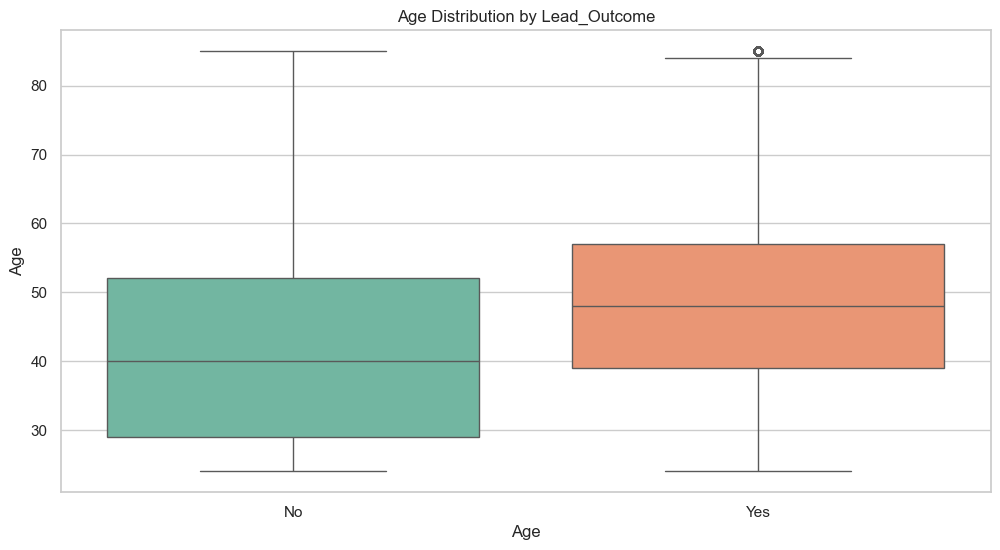

In [38]:
plot_distribution('Age')
plot_by_target('Age')

##### Gender

C:\Users\thamu\AppData\Local\Temp\ipykernel_7592\2402550579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_resampled, palette='viridis')


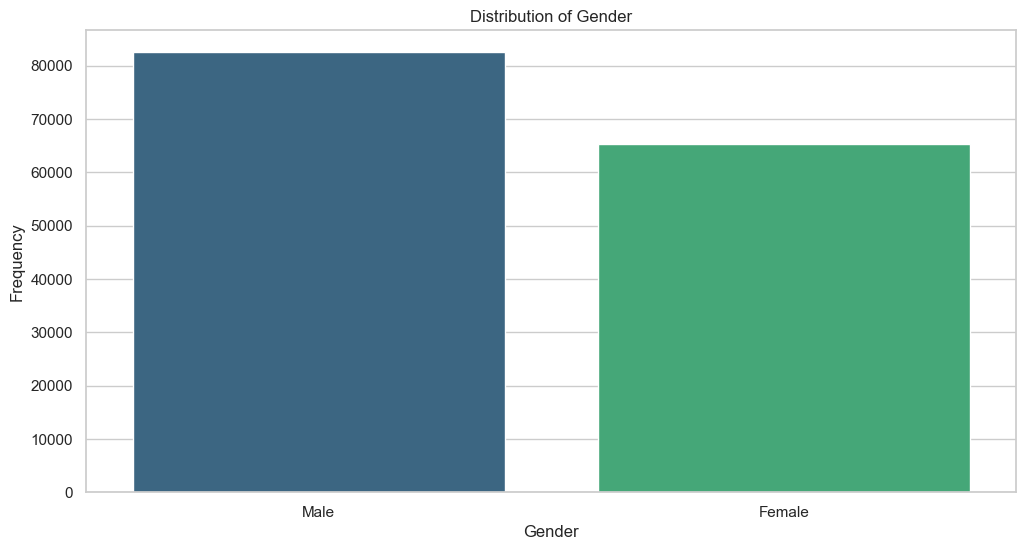

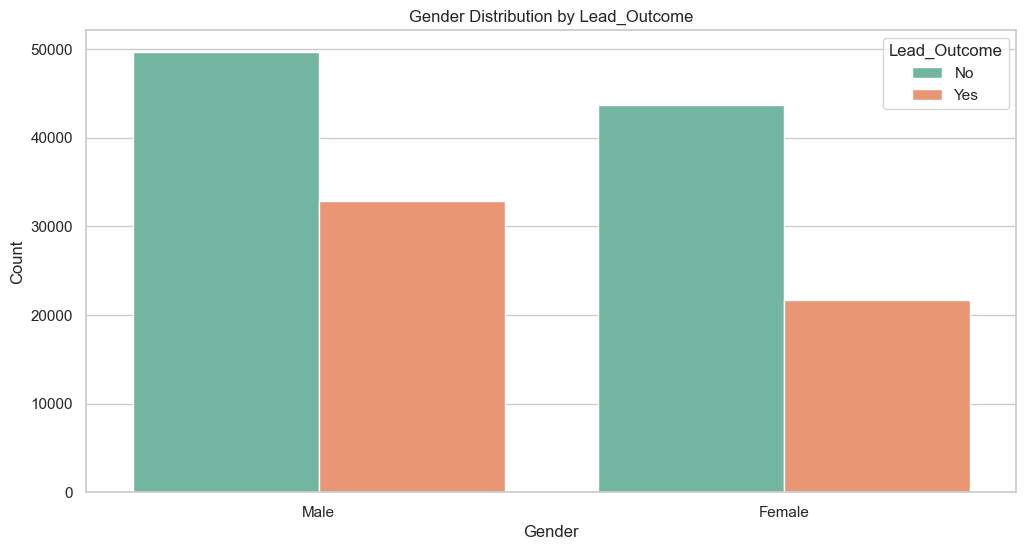

In [39]:
plot_distribution('Gender')
plot_by_target('Gender')

##### Occupation

C:\Users\thamu\AppData\Local\Temp\ipykernel_7592\2402550579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_resampled, palette='viridis')


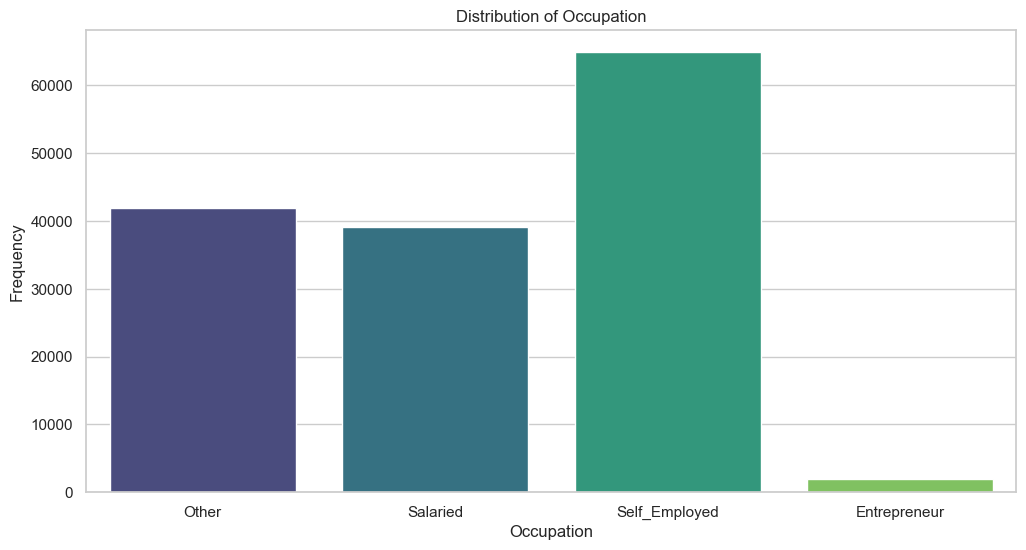

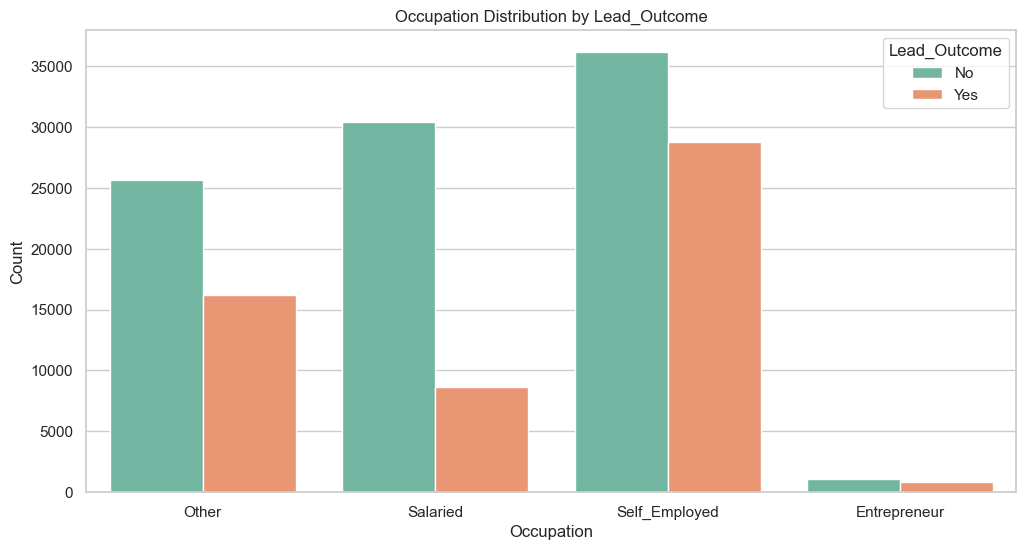

In [40]:
plot_distribution('Occupation')
plot_by_target('Occupation')

##### Loan Status

C:\Users\thamu\AppData\Local\Temp\ipykernel_7592\2402550579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_resampled, palette='viridis')


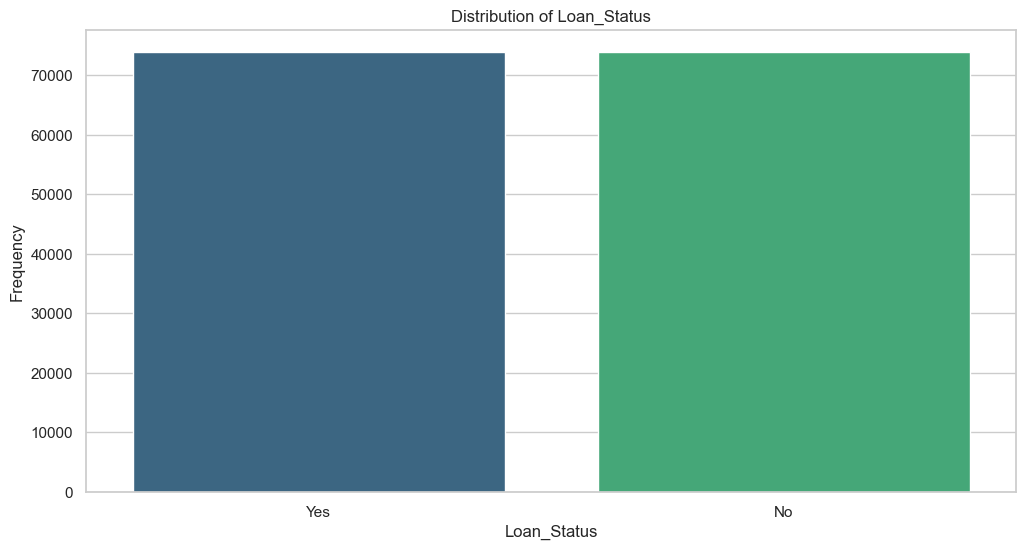

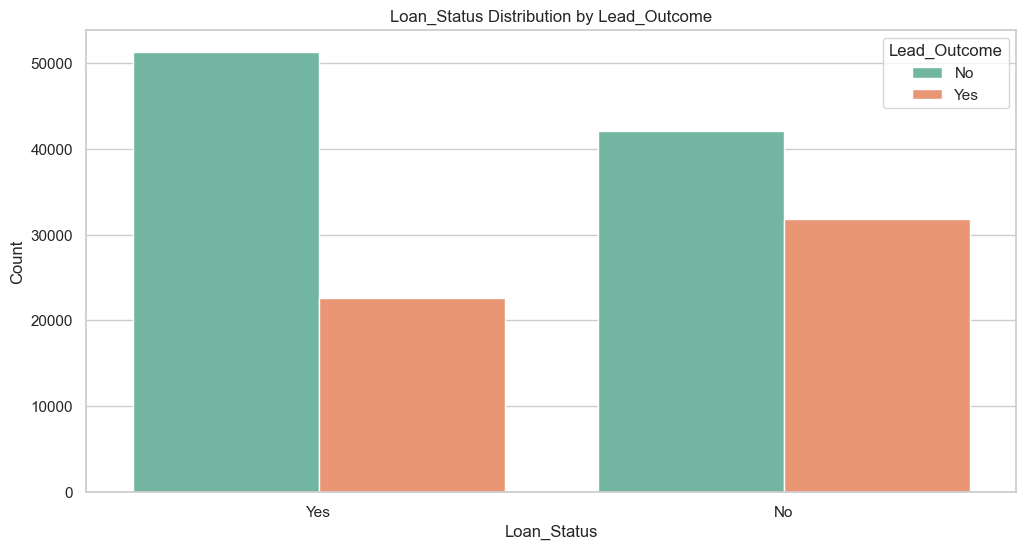

In [41]:
plot_distribution('Loan_Status')
plot_by_target('Loan_Status')

##### Existing Credit Score

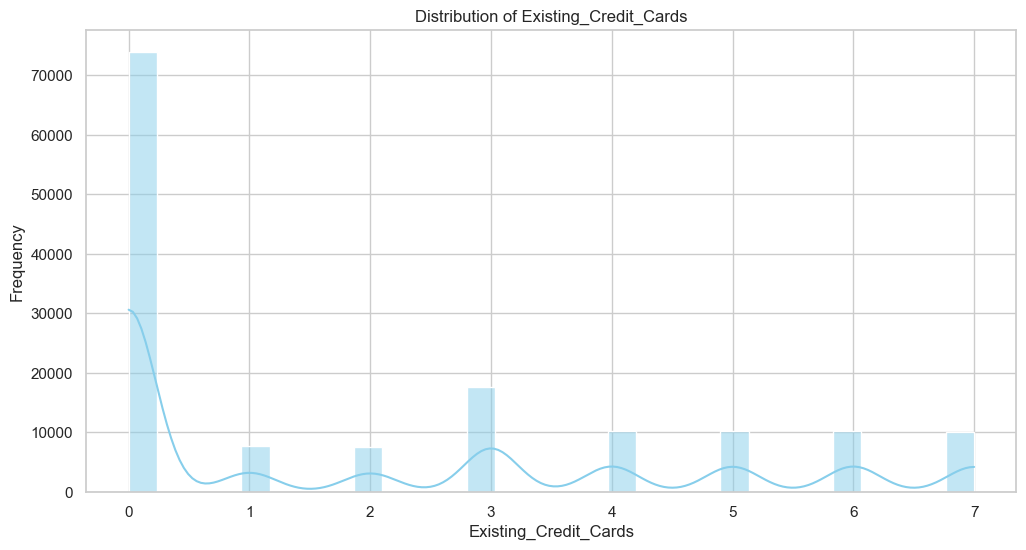

C:\Users\thamu\AppData\Local\Temp\ipykernel_7592\2402550579.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=column, data=df_resampled, palette='Set2')


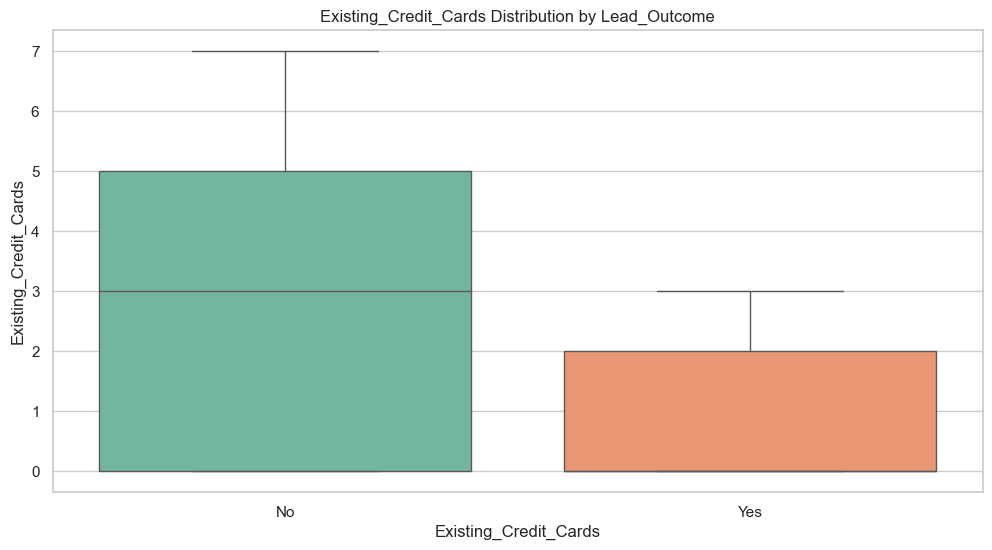

In [42]:
plot_distribution('Existing_Credit_Cards')
plot_by_target('Existing_Credit_Cards')

##### Account Category

C:\Users\thamu\AppData\Local\Temp\ipykernel_7592\2402550579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_resampled, palette='viridis')


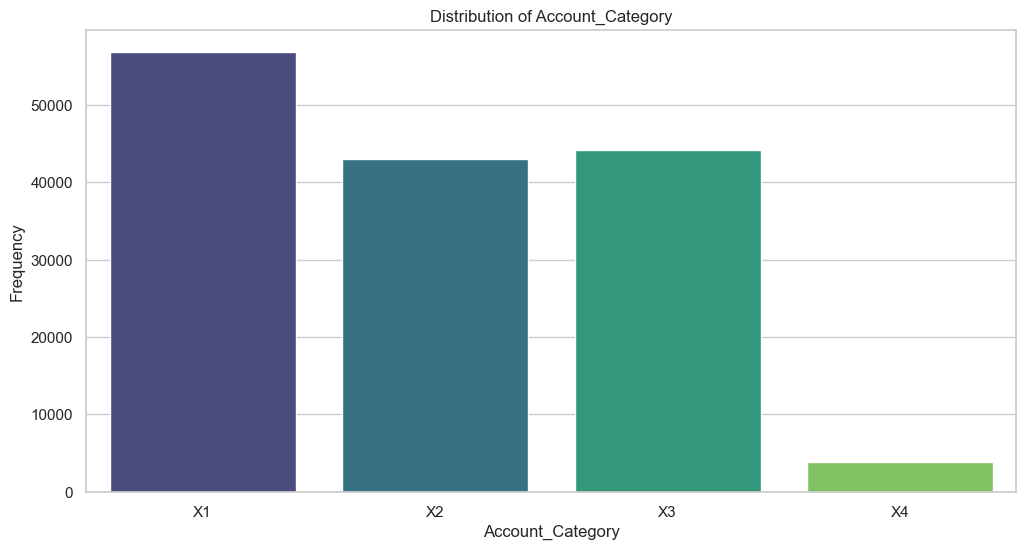

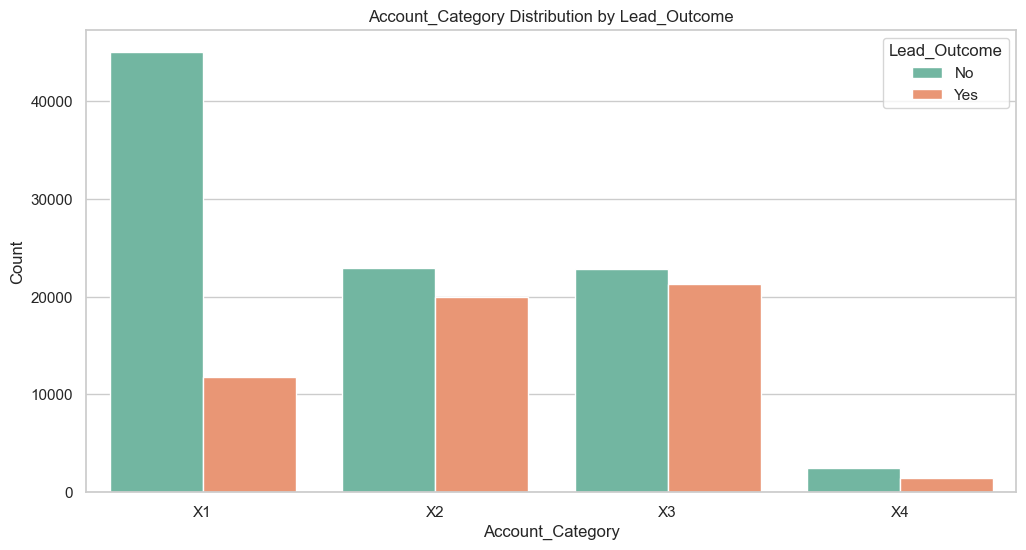

In [43]:
plot_distribution('Account_Category')
plot_by_target('Account_Category')

##### Tenure With Bank

C:\Users\thamu\AppData\Local\Temp\ipykernel_7592\2402550579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_resampled, palette='viridis')


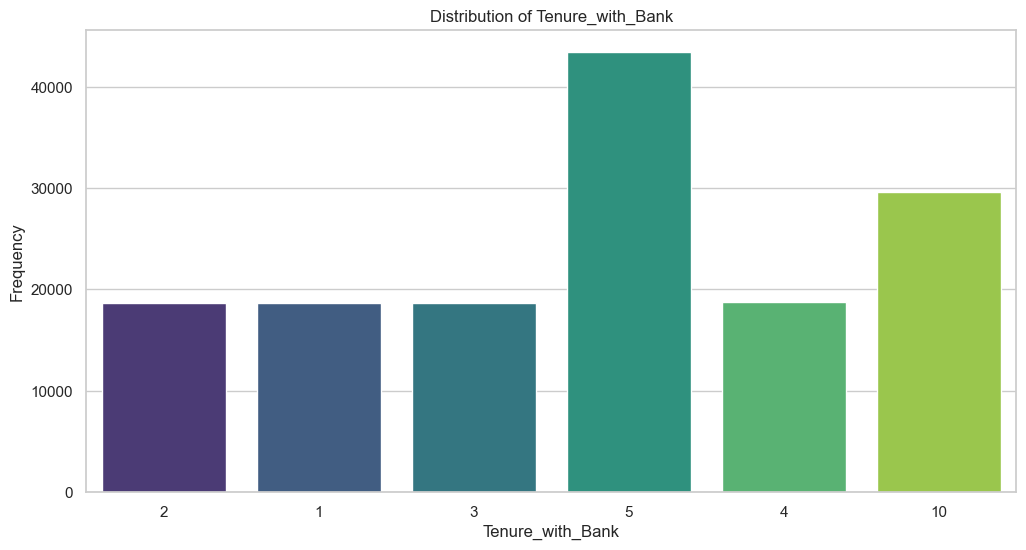

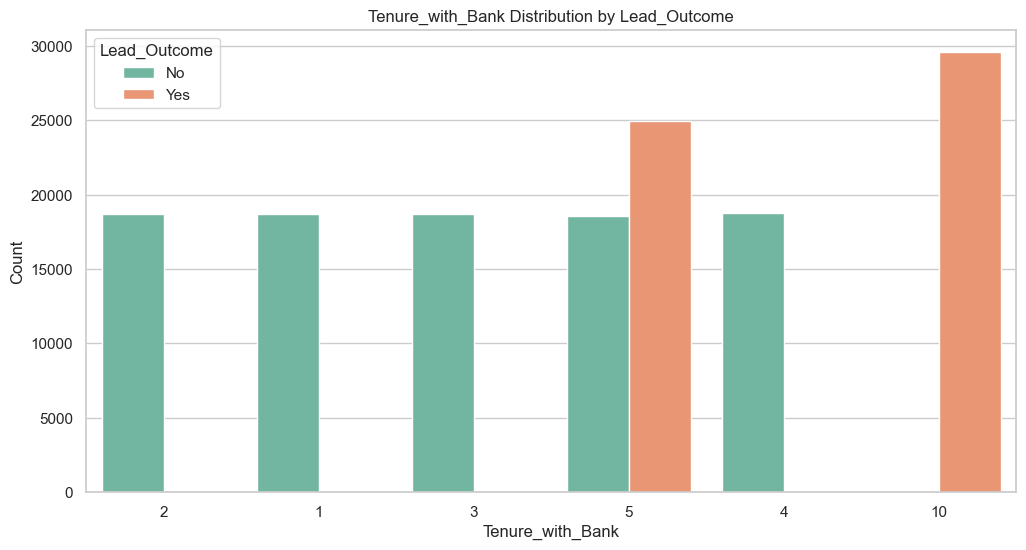

In [44]:
plot_distribution('Tenure_with_Bank')
plot_by_target('Tenure_with_Bank')

##### Lead Outcome

C:\Users\thamu\AppData\Local\Temp\ipykernel_7592\2402550579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_resampled, palette='viridis')


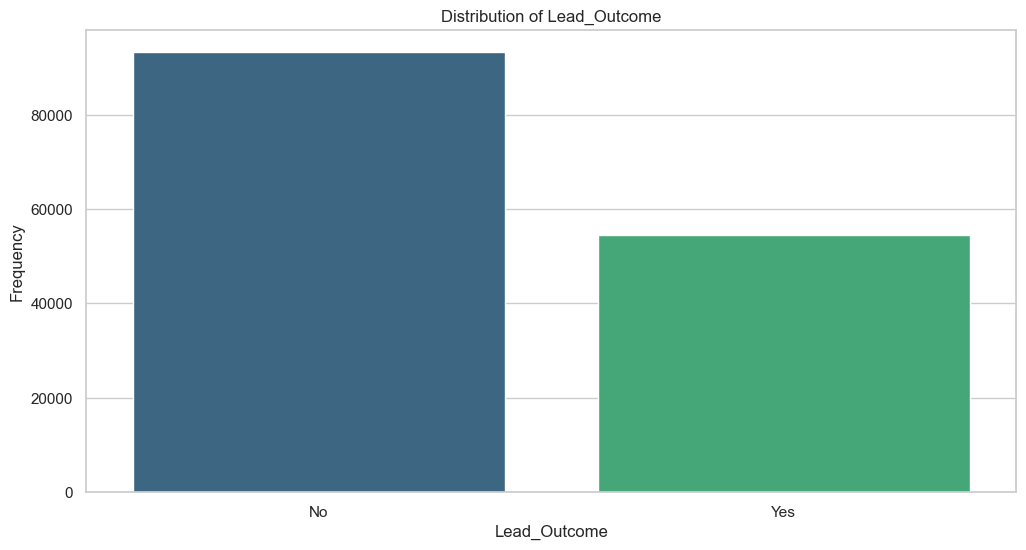

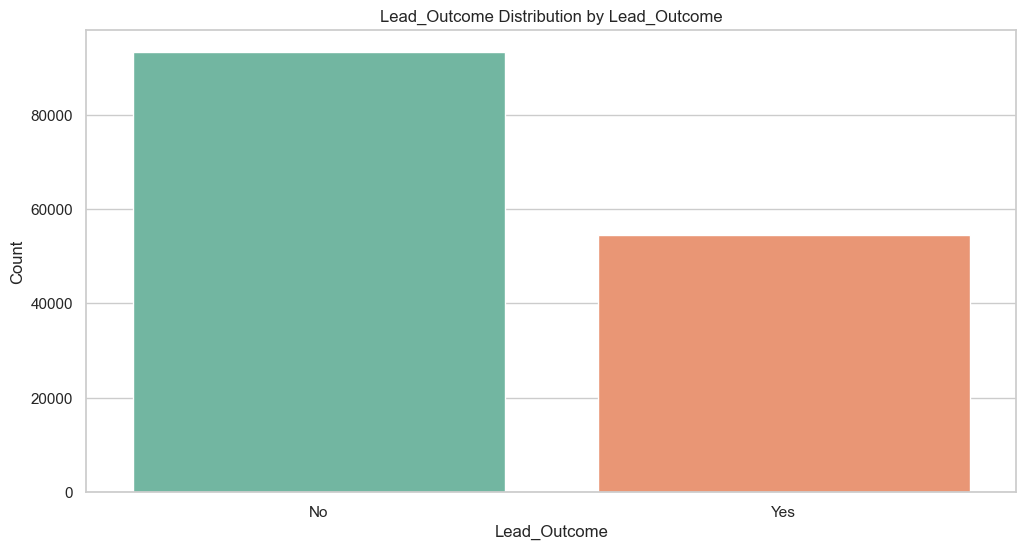

In [45]:
plot_distribution('Lead_Outcome')
plot_by_target('Lead_Outcome')

##### Label Encode and One-hot encode"

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Assuming df_resampled and categorical_cols are already defined
label_encoder = LabelEncoder()
df_resampled['Lead_Outcome'] = label_encoder.fit_transform(df_resampled['Lead_Outcome'])
categorical_cols.remove('Lead_Outcome')

# Dictionary to store the OneHotEncoders for each column
onehot_encoders = {}

# Loop through each column and apply one-hot encoding
for col in categorical_cols:
    ohe = OneHotEncoder(sparse_output=False, drop=None)  # Initialize OneHotEncoder
    encoded = ohe.fit_transform(df_resampled[[col]])  # Fit and transform the column

    # Create a DataFrame with the new one-hot encoded columns
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out([col]))

    # Convert all values to integers (0 or 1)
    encoded_df = encoded_df.astype(int)

    # Concatenate the new one-hot encoded columns to the original DataFrame
    df_resampled = pd.concat([df_resampled, encoded_df], axis=1)
    
    # Drop the original column after encoding
    df_resampled.drop(columns=[col], inplace=True)
    
    # Store the OneHotEncoder for later use if needed
    onehot_encoders[col] = ohe

# Print the resulting DataFrame
print(df_resampled)


        Month_Income  Age  Credit_Score  Existing_Credit_Cards  \
0            96345.0   29           623                      4   
1            85640.0   43           629                      0   
2            96345.0   31           357                      0   
3            85640.0   29           356                      0   
4            42820.0   29           572                      0   
...              ...  ...           ...                    ...   
147835      157875.0   42           754                      3   
147836      157875.0   69           794                      2   
147837       85640.0   52           606                      3   
147838       42820.0   82           326                      5   
147839       74935.0   59           360                      6   

        Avg_Account_Balance Tenure_with_Bank  Lead_Outcome  Gender_Female  \
0                    742366                2             0              0   
1                    925537                1         

In [47]:
df_resampled.head()

,Month_Income,Age,Credit_Score,Existing_Credit_Cards,Avg_Account_Balance,Tenure_with_Bank,Lead_Outcome,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Loan_Status_No,Loan_Status_Yes,Account_Category_X1,Account_Category_X2,Account_Category_X3,Account_Category_X4
0,96345.0,29,623,4,742366,2,0,0,1,0,1,0,0,0,1,1,0,0,0
1,85640.0,43,629,0,925537,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,96345.0,31,357,0,215949,1,0,0,1,0,0,1,0,1,0,1,0,0,0
3,85640.0,29,356,0,868070,3,0,0,1,0,1,0,0,1,0,1,0,0,0
4,42820.0,29,572,0,657087,3,0,1,0,0,1,0,0,1,0,1,0,0,0


#### Training data set

In [48]:
X = df_resampled.drop('Lead_Outcome', axis=1).values  # Features
y = df_resampled['Lead_Outcome'].values  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [49]:
# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for more detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28081
           1       1.00      1.00      1.00     16271

    accuracy                           1.00     44352
   macro avg       1.00      1.00      1.00     44352
weighted avg       1.00      1.00      1.00     44352



#### save model

In [50]:
import joblib

# Save the model
joblib.dump(model, '../TrainedModels/decision_tree_model.pkl')


['../TrainedModels/decision_tree_model.pkl']

#### Loard model

In [51]:
import joblib

# Load the model
model = joblib.load('../TrainedModels/decision_tree_model.pkl')
